# Import dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.options.display.max_columns = None

%matplotlib inline

# Load dataset

In [2]:
hr_data_set = pd.read_csv('../data/HRDataset_v14.csv', sep=',')
hr_data_set.sample(frac=1, random_state=42).reset_index(drop=True)
hrdataset = hr_data_set
hrdataset.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Transform data

Salary, Position, Sex, MaritalDesc, RaceDesc, RecruitmentSource

In [3]:
dataNumerical = [
    'PerfScoreID',
    'DaysLateLast30',
    'EngagementSurvey'
]

dataCategorical = [
    'Sex',
]

filteredData = hrdataset.copy(deep=True)

importantColumns = dataNumerical + dataCategorical

for c in dataCategorical:
    filteredData[c] = pd.factorize(filteredData[c])[0] + 1

importantData = filteredData[importantColumns]

# Show the reduction
importantData.head()

,PerfScoreID,DaysLateLast30,EngagementSurvey,Sex
0,4,0,4.60,1
1,3,0,4.96,1
2,3,0,3.02,2
3,3,0,4.84,2
4,3,0,5.00,2


# Dimensionality Reduction

In [4]:
# Parse every value to a float
importantData = importantData.apply(lambda c1: c1.apply(lambda value: float(value)))
cleanedData = importantData.dropna()
cleanedData = cleanedData.to_numpy()

print('The data was reduced to', cleanedData.size, 'samples from', importantData.size, 'samples.')
importantData.head()

The data was reduced to 1244 samples from 1244 samples.


,PerfScoreID,DaysLateLast30,EngagementSurvey,Sex
0,4.0,0.0,4.60,1.0
1,3.0,0.0,4.96,1.0
2,3.0,0.0,3.02,2.0
3,3.0,0.0,4.84,2.0
4,3.0,0.0,5.00,2.0


## MDS (Multidimensional Scaling)

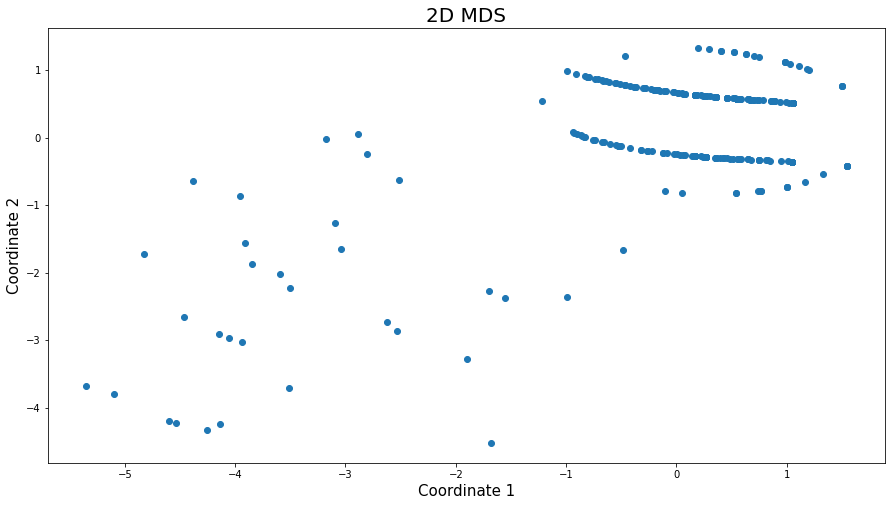

2425.184992677374


In [5]:
mds = MDS(random_state=0, metric=True, n_init=4, max_iter=300)
principalComponents = mds.fit_transform(cleanedData)
principalDf = pd.DataFrame(data = principalComponents)
principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:,0], principleArray[:,1])
plt.xlabel('Coordinate 1', fontsize = 15)
plt.ylabel('Coordinate 2', fontsize = 15)
plt.title('2D MDS', fontsize = 20)
plt.show()

stress = mds.stress_
print(stress)

In this graph an MDS is shown.
I took the complete dataset, because the computation doesn't take very long for 1866 rows. The points are very spread around the diagram, indicating the data can't be clustered very well. At the top there are two lines that are very condense and two sparse lines.

## PCA

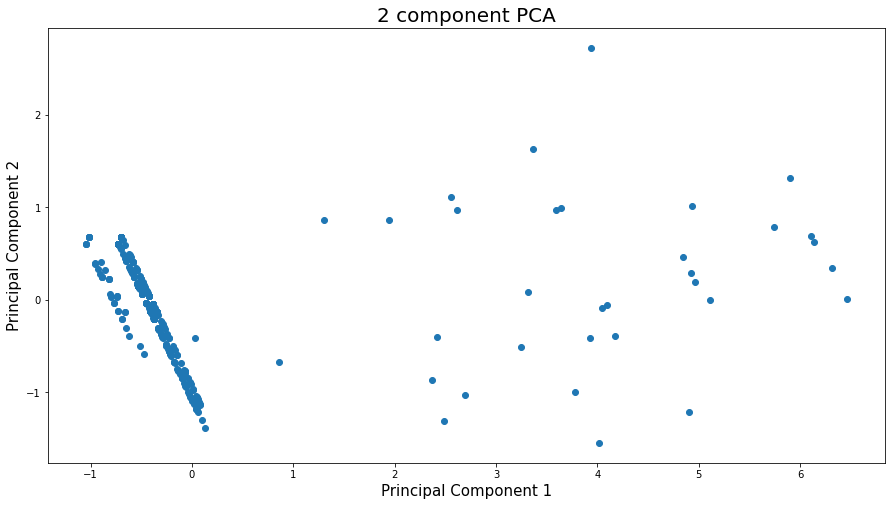

Principle component 1 contains 74.57123601938943 of the variance
Principle component 2 contains 12.239950466684684 of the variance
The combined variance is 86.8111864860741


In [6]:
# cleanedData = StandardScaler().fit_transform(cleanedData)

pca = PCA(n_components=2, )

principalComponents = pca.fit_transform(cleanedData)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:,0], principleArray[:,1])
plt.xlabel('Principal Component 1', fontsize = 15)
plt.ylabel('Principal Component 2', fontsize = 15)
plt.title('2 component PCA', fontsize = 20)
plt.show()


# Explain variance

pcaVariance = pca.explained_variance_ratio_
pc1Variance = pcaVariance[0]
pc2Variance = pcaVariance[1]

print('Principle component 1 contains', pcaVariance[0] * 100, 'of the variance')
print('Principle component 2 contains', pcaVariance[1] * 100, 'of the variance')
print('The combined variance is', (pc1Variance + pc2Variance) * 100)

Here a basic 2D PCA was performed. The same data as for the MDS was used. The component 2 accounts for 12.2% of the total variance. The component 1 accounts for 74.5% of the variance. In total this is about 87% of the total variance. The variance for both components is  very high, although the plot indicates a greater variance. The data-points are very spread across the diagram just like in the MDS. But two dense line exist at the bottom left of the diagram and two sparse also exist. This is very similar to the MDS with a few lines and the rest of the data is spread around.

## t-SNE

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 311 samples in 0.001s...
[t-SNE] Computed neighbors for 311 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 311 / 311
[t-SNE] Mean sigma: 0.186151


/home/user/PycharmProjects/data-science/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.743042
[t-SNE] KL divergence after 1000 iterations: 0.103201


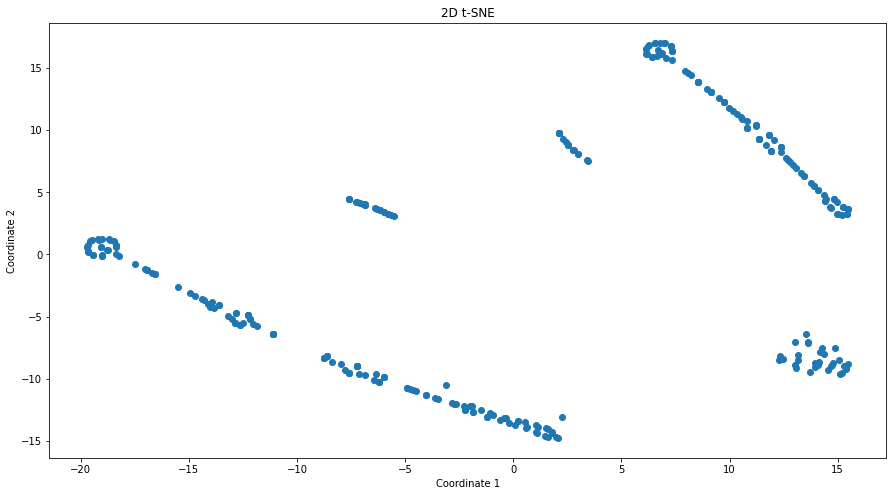

In [7]:
tsne = TSNE(n_components=2, verbose=1, learning_rate='auto')
principalComponents = tsne.fit_transform(importantData)
principalDf = pd.DataFrame(data = principalComponents)
principleArray = principalDf.to_numpy()

fig = plt.figure(figsize = (15,8))
plt.scatter(principleArray[:,0], principleArray[:,1])
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('2D t-SNE')
plt.show()


For t-SNE I also took the same sample as for PCA and MDS. The computation time of t-SNE is ok for this small data-set. There seems to be five dense line-shaped clusters in the plot. The result looks very different than PCA and MDS. t-SNE has a very distinct clusters, whereas PCA and MDS seem to have small line-shaped clusters and the other points are spread around the diagram. All three types of algorithms seem to produce some line where many points are condensed.

In [ ]:
![TSNE 1](./img/hr-tsne1.png)

![TSNE 2](./img/hr-tsne2.png)

![TSNE 2](./img/hr-tsne3.png)

The positions of the clusters are different, but the clusters look almost the same. The t-SNE seems always to produce round about 5 clusters that look quite the same. The position is different though.